In [75]:
import numpy as np
import pandas as pd
import os
import matplotlib
import matplotlib.pyplot as plt

from plotting import *

In [76]:
results_dfc = pd.read_csv(os.getcwd() + f'/../out/hpsearches-final/hpconfig_domain-mnist-sparse-rec/search_results.csv', delimiter=';')

# 20,20 30,30 50,50
results_bp = pd.read_csv(os.getcwd() + f'/../out/hyperparam_search/search_2023-03-28_15-54-49/search_results.csv', delimiter=';')

# 21,21
results_bp = results_bp.append(pd.read_csv(os.getcwd() + f'/../out/hyperparam_search/search_2023-03-28_17-19-28/search_results.csv', delimiter=';'))

# 100,100
results_bp = results_bp.append(pd.read_csv(os.getcwd() + f'/../out/hyperparam_search/search_2023-03-28_17-40-44/search_results.csv', delimiter=';'))

# 22,22 25,25
results_bp = results_bp.append(pd.read_csv(os.getcwd() + f'/../out/hyperparam_search/search_2023-03-28_18-16-18/search_results.csv', delimiter=';'))

In [77]:
results, interesting_cols = preprocess_performance_data(results_dfc, results_bp, None, None, None, 'domain', 'CLB', 'LR')

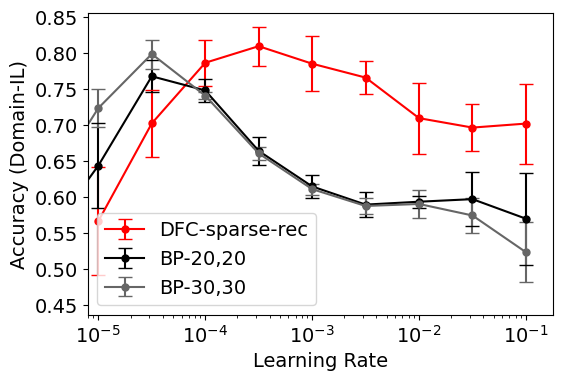

In [91]:
not_groupby_cols = ['task_test_accu_last', 'random_seed', 'lr_rec', 'task_train_accu_last',
                        'rec_learning_neurons', 'rec_grad_normalization', 'permanent-sparsification',
                        'rec_inference_iterations', 'fw_grad_normalization', 'turn_off_rec_norm_normalization',
                        'hebbian_fw_learning', 'sparsity_level_function', 'frac_rec_deciding_sparsity', 'from_ff_learning',
                       'block_non_sparsified_neurons', 'network_type', 'reg_coef']
x_axis_value = 'lr'
metric_type = 'test'
line_fmt='-o'
markersize=5
fontsize=14
capsize=5
red_mode='dfc-sparse-rec'
plt.style.use('grayscale')
plt.gcf().patch.set_facecolor('white')
matplotlib.rcParams["figure.dpi"] = 100


for mode in ['dfc-sparse-rec', 'bp']:
    
    sizes = ['20,20'] if mode == 'dfc-sparse-rec' else ['20,20', '30,30']
    for size in sizes:
        selected_results = results[
                (results['mode'] == mode) &
                (results['size_hidden'] == size)
            ]
        
        groupby_cols = [x for x in selected_results.columns if x not in not_groupby_cols]
        
        if mode.startswith('bp'):
            group_by_cols_curr = [x for x in groupby_cols if x in results_bp.columns]
        else:
            group_by_cols_curr = groupby_cols
        
        grouped = selected_results.groupby(by=group_by_cols_curr)
        means = grouped.mean().reset_index()
        
        size_str = '' if mode == 'dfc-sparse-rec' else '-'+size

        stds = grouped.std().reset_index()
        plt.errorbar(means[x_axis_value], means[f'task_{metric_type}_accu_last'],
                     yerr=stds[f'task_{metric_type}_accu_last'], label=capitalize_label(mode)+size_str, fmt=line_fmt, markersize=markersize, capsize=capsize,
                            color=('red' if mode==red_mode else None))
plt.xscale('log')
plt.xlim(10**(-5.1))
plt.legend(prop={'size': fontsize}, loc='lower left')
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.ylabel('Accuracy (Domain-IL)', fontsize=fontsize)
plt.xlabel('Learning Rate', fontsize=fontsize)
plt.savefig(f'fig7.svg', format='svg', bbox_inches = "tight")